In [112]:
import pandas as pd

In [113]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [114]:
df = pd.read_csv(url)

In [115]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [118]:
df.rename(columns={'Channel':'canal', 'Region':'regiao', 
                   'Fresh':'alimentos_frescos', 
                   'Milk':'laticinios', 
                   'Grocery':'mercado', 
                   'Frozen':'congelados', 
                   'Detergents_Paper':'limpeza_papel', 
                   'Delicassen':'frios'}, inplace=True)

In [117]:
# df.replace?

In [119]:
df.head()

,canal,regiao,alimentos_frescos,laticinios,mercado,congelados,limpeza_papel,frios
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [120]:
# c de clustering
dfc = df.drop(labels=['canal', 'regiao'], axis=1)

In [121]:
dfc.head()

,alimentos_frescos,laticinios,mercado,congelados,limpeza_papel,frios
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [122]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   alimentos_frescos  440 non-null    int64
 1   laticinios         440 non-null    int64
 2   mercado            440 non-null    int64
 3   congelados         440 non-null    int64
 4   limpeza_papel      440 non-null    int64
 5   frios              440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [123]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
alimentos_frescos,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
laticinios,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
mercado,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
congelados,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
limpeza_papel,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
frios,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [124]:
# gráfico - pairplot
# correlacao - heatmap

In [125]:
import seaborn as sns

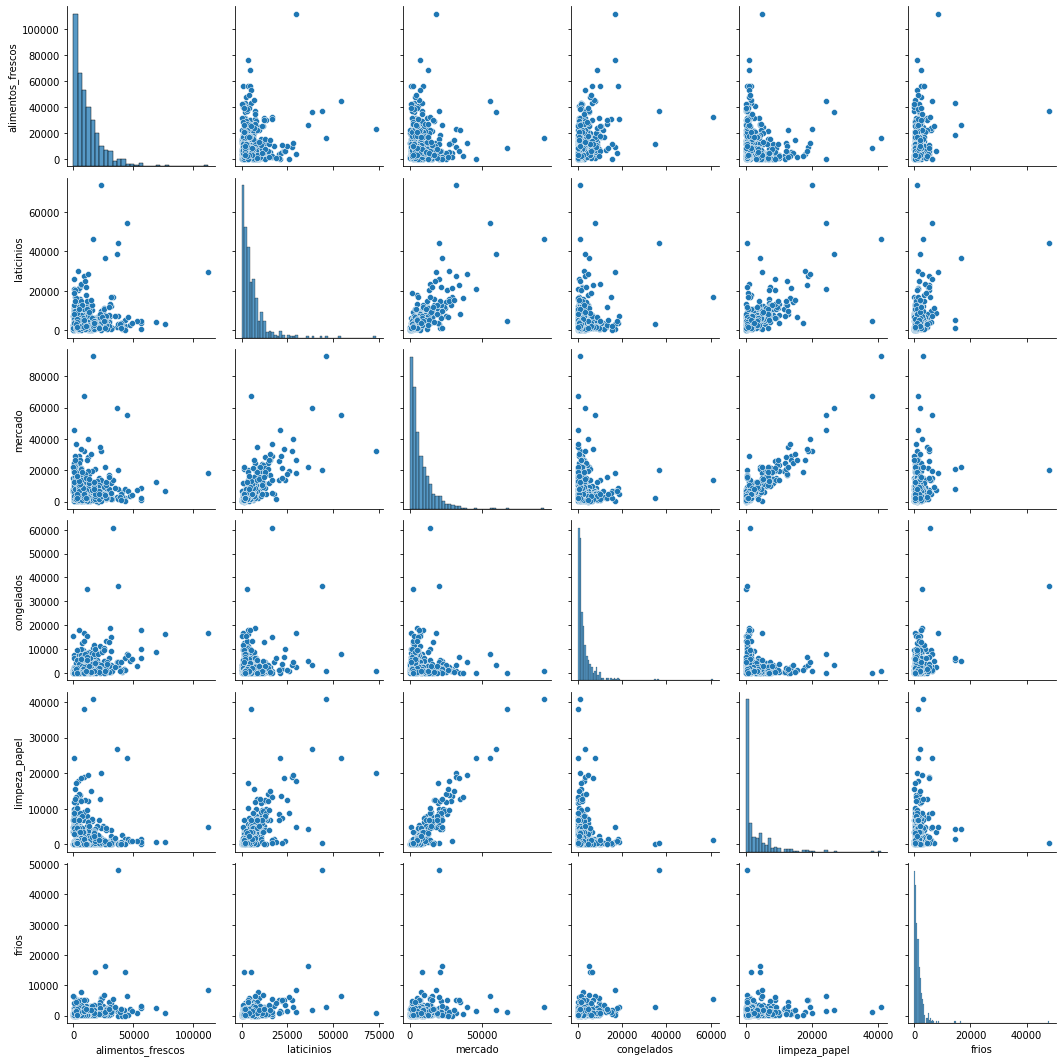

In [126]:
sns.pairplot(dfc)

In [127]:
# boxplot
# outliers
# log para normalizar

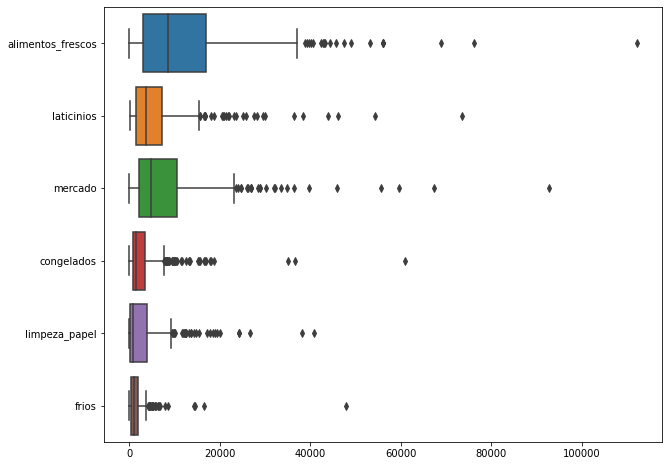

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) # altura, largura
sns.boxplot(data=dfc, orient='h')

In [133]:
import numpy as np

dfclog = dfc.apply(np.log1p)

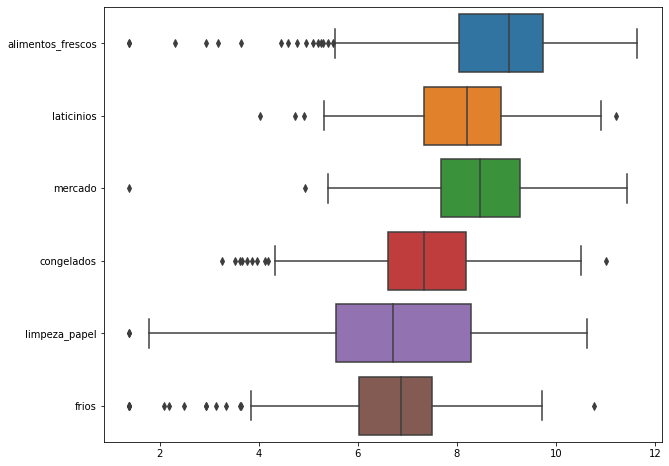

In [134]:
plt.figure(figsize=(10, 8)) # altura, largura
sns.boxplot(data=dfclog, orient='h')

In [135]:
# from scipy.stats import iqr

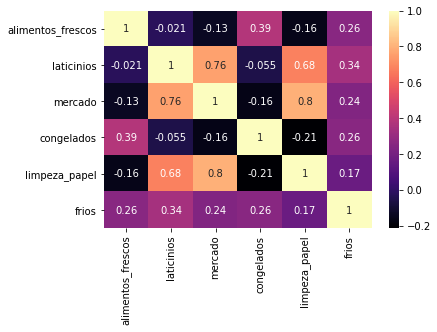

In [139]:
sns.heatmap(dfclog.corr(), annot=True, cmap='magma');

In [140]:
# clusterização 

In [141]:
from sklearn.cluster import KMeans

In [142]:
kmeans = KMeans(n_clusters=8)

In [143]:
kmeans.fit(dfclog)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
kmeans.n_clusters

8

In [150]:
len(kmeans.labels_)

440

In [ ]:
# reposta da clusterização
# kmeans.labels_

In [146]:
# kmeans.score()

In [148]:
from sklearn.metrics import silhouette_score

In [151]:
silhouette_score(dfclog, kmeans.labels_)

0.2003719694109072

In [153]:
for numero_clusters in range(2, 10):
  kmeans = KMeans(n_clusters=numero_clusters)
  kmeans.fit(dfclog)
  score = silhouette_score(dfclog, kmeans.labels_)
  print(f'Clusters: {kmeans.n_clusters}, score: {score:.2f}')

Clusters: 2, score: 0.30
Clusters: 3, score: 0.26
Clusters: 4, score: 0.19
Clusters: 5, score: 0.20
Clusters: 6, score: 0.20
Clusters: 7, score: 0.20
Clusters: 8, score: 0.20
Clusters: 9, score: 0.17


In [155]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dfclog)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [158]:
dfclog['rotulos'] = kmeans.labels_

In [159]:
dfclog.head()

,alimentos_frescos,laticinios,mercado,congelados,limpeza_papel,frios,rotulos
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,1
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,1
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,1
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,0
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,1


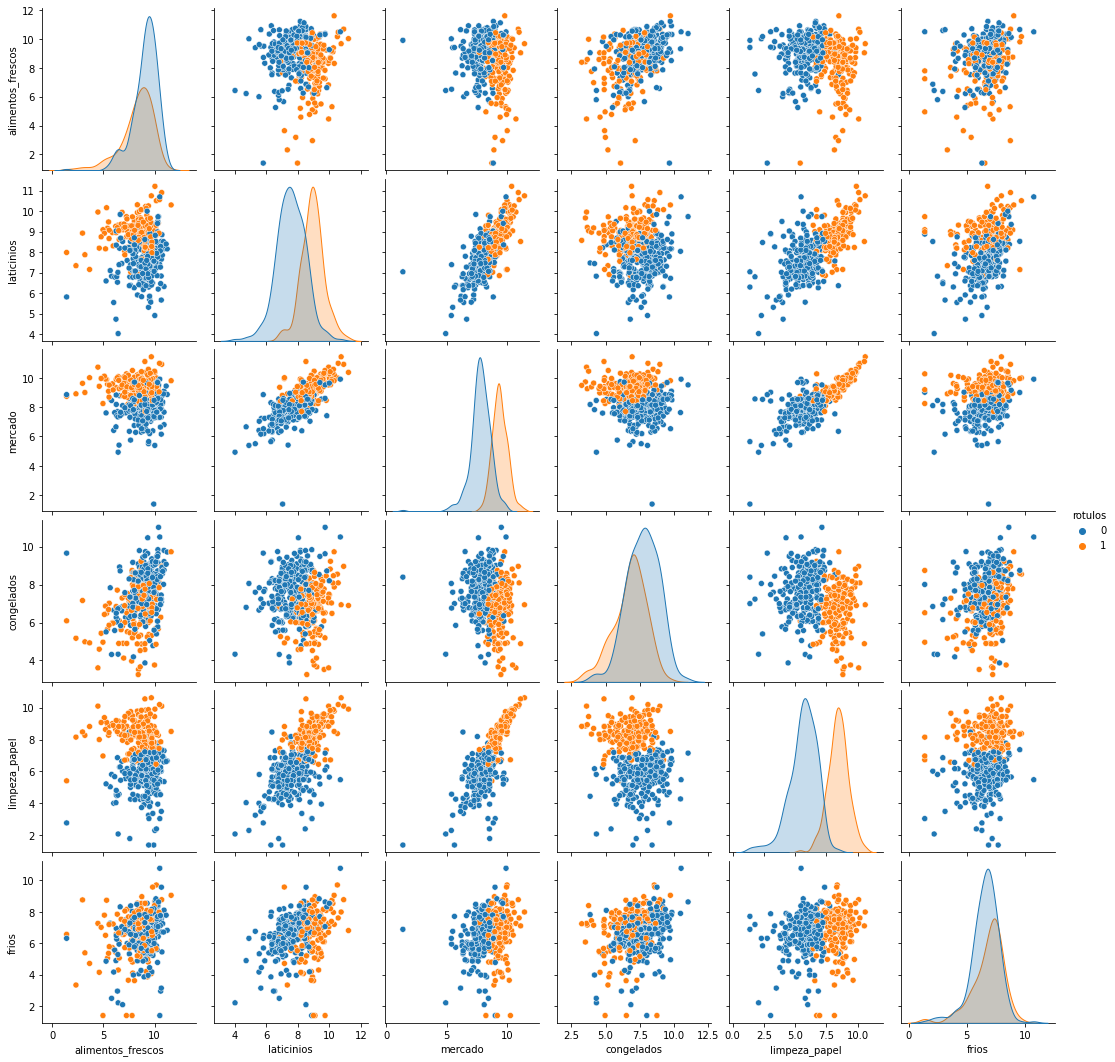

In [161]:
sns.pairplot(dfclog, hue='rotulos')

In [162]:
# temos 6 dimensões - só que descobrimos uma divisão em duas classes dos nossos dados
# se quisermos plotar essas duas dimensões, como podemos fazer isso?
# como podemos passar de 6 dimensões para duas?